In [101]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
warnings.filterwarnings('ignore')

In [102]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [103]:
useducation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [104]:
useducation_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [151]:
useducation_df.isnull().sum()*100/useducation_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [152]:
useducation2_df = useducation_df.copy()
states = useducation_df["STATE"].unique()

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

for state in states:
    useducation2_df.loc[useducation2_df["STATE"] == state, fill_list] = useducation2_df.loc[useducation2_df["STATE"] == state, fill_list].interpolate()

useducation2_df.dropna(inplace=True)

In [117]:
useducation2_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


Total Revenue are more skewed to the left since the mean is very close to the 75% percentile. it is the case for all parts of the revenue. total revenue are shered between state and local revenues while federal revenue represent less than 10% of the revenue.

It is the same case in regard to total expediture. it is skewed to the left as well, more than 50% of the expenditure were instruction expenditures.

In average the total revenue is less than total expenditure which mioght be a problem and need to be invistigated, but the maximum value for total revenues is higher than the maximum value of total expenditure.

Students scores are approcimately central (Slightly skewed to the right) despite the fact that revenues and expeditures are more skewed to the left. This indicate that revenues and expenditures are relatively high compare to what is expected from the students in terms of scores.

In average students score much higher in math compare to reading but the reading scores are less variante compare to the math.


In [118]:
california = useducation2_df.loc[(useducation2_df["STATE"] == "CALIFORNIA")]
california.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
420,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,...,489043.0,441877.0,357789.0,3804640.0,1707952.0,5602511.0,213.565125,262.171027,205.916588,264.494066
576,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,5899326.0,227.454982,267.049501,205.632437,255.073380
680,2005_CALIFORNIA,CALIFORNIA,2005,6307022.0,62171797.0,7148863.0,34912166.0,20110768.0,66196072.0,31070450.0,...,477828.0,489560.0,423241.0,3848455.0,1953077.0,5926631.0,230.366957,268.558129,206.512026,264.184510
784,2007_CALIFORNIA,CALIFORNIA,2007,6288686.0,72516936.0,7200298.0,42333637.0,22983001.0,73225422.0,34685013.0,...,467305.0,490054.0,468281.0,3801685.0,2011865.0,5881552.0,230.034091,270.381784,208.522186,268.159428


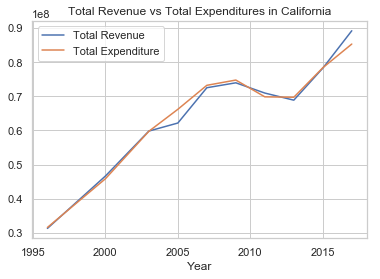

In [119]:
sns.set(style="whitegrid")
g = sns.lineplot(x= "YEAR", y="TOTAL_REVENUE", data = california, label="Total Revenue")
g = sns.lineplot(x= "YEAR", y="TOTAL_EXPENDITURE", data = california, label="Total Expenditure")
g.set(xlabel='Year', ylabel='')
plt.title('Total Revenue vs Total Expenditures in California')
plt.show()

The trend for both revnues and expenditures is going up simultaneously. There was adrop after 2008 due to financial crises which slowed the economy in and after 2008, but the trend returend to go up after 2012.There are budget deficit but it was not big.in 2016 and 2017 the revenues where higher than expenditures which is a good sign but it is too early to predict if this is going to continue 

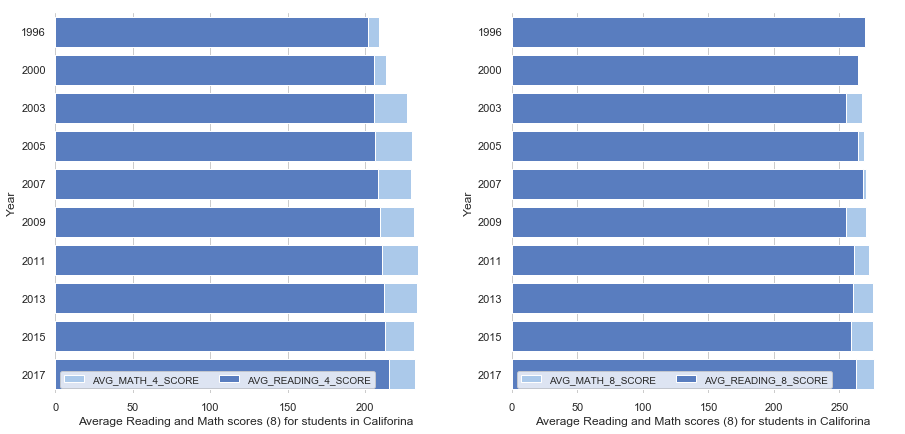

In [120]:
f, ax = plt.subplots(figsize=(15, 7))

plt.subplot(1,2,1)
sns.set_color_codes("pastel")
sns.barplot(x="AVG_MATH_4_SCORE", y="YEAR", data=california,
            label="AVG_MATH_4_SCORE", color="b", orient = 'h')

sns.set_color_codes("muted")
sns.barplot(x="AVG_READING_4_SCORE", y="YEAR", data=california,
            label="AVG_READING_4_SCORE", color="b", orient = 'h')

plt.legend(ncol=2, loc="lower left", frameon=True, fontsize=10)
plt.ylabel('Year')
plt.xlabel('Average Reading and Math scores (8) for students in Califorina')
sns.despine(left=True, bottom=True)

plt.subplot(1,2,2)
sns.set_color_codes("pastel")
sns.barplot(x="AVG_MATH_8_SCORE", y="YEAR", data=california,
            label="AVG_MATH_8_SCORE", color="b", orient = 'h')

sns.set_color_codes("muted")
sns.barplot(x="AVG_READING_8_SCORE", y="YEAR", data=california,
            label="AVG_READING_8_SCORE", color="b", orient = 'h')

plt.legend(ncol=2, loc="lower left", frameon=True, fontsize=10)
plt.ylabel('Year')
plt.xlabel('Average Reading and Math scores (8) for students in Califorina')
sns.despine(left=True, bottom=True)

plt.show()

In geeneral, students score higher in math compare to reading. The gap is increasing in the recent years. The difference is higher between math 4 and reading 4 compare to math 8 and reading 8.In the 90's, the reading score for reading 8 was higher than math 8. In general the gap between math and reading scores in increasing over time.

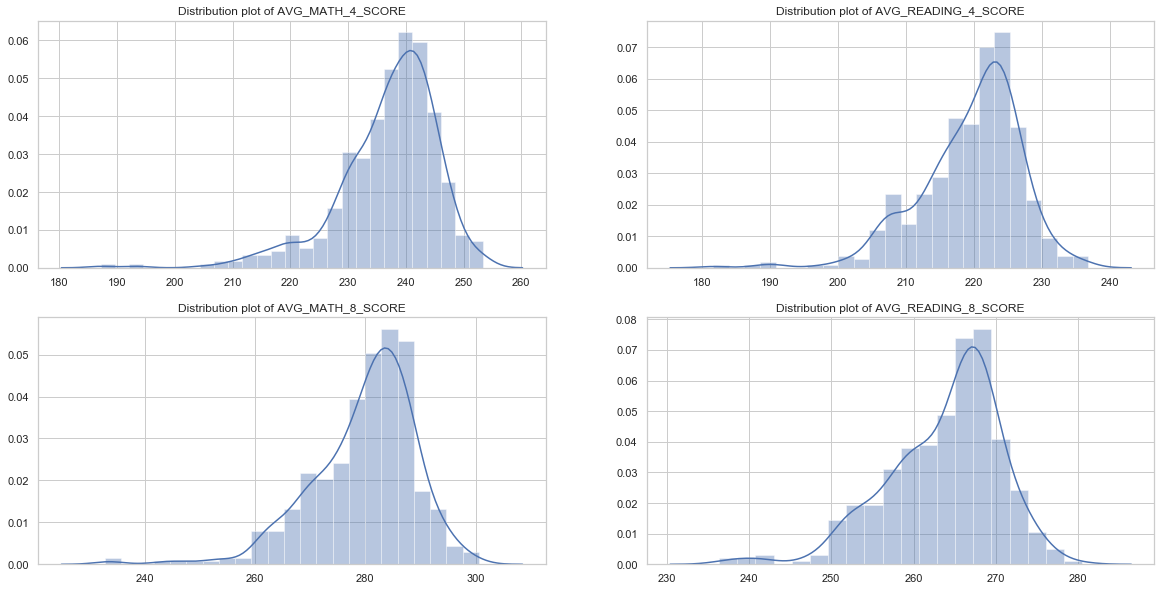

In [129]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(useducation2_df['AVG_MATH_4_SCORE'])
plt.title("Distribution plot of AVG_MATH_4_SCORE")
plt.xlabel('')

plt.subplot(2,2,2)
sns.distplot(useducation2_df['AVG_READING_4_SCORE'])
plt.title("Distribution plot of AVG_READING_4_SCORE")
plt.xlabel('')

plt.subplot(2,2,3)
sns.distplot(useducation2_df['AVG_MATH_8_SCORE'])
plt.title("Distribution plot of AVG_MATH_8_SCORE")
plt.xlabel('')

plt.subplot(2,2,4)
sns.distplot(useducation2_df['AVG_READING_8_SCORE'])
plt.title("Distribution plot of AVG_READING_8_SCORE")
plt.xlabel('')

plt.show()

Distribuitions for both math and reading are more skewed to the right with more outliers for lower scores (Mean < Median). This indicated that most students are doing well in both subjects.

In [162]:
useducation3_df = useducation2_df.copy()

fill_list2 = ["AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", 
             "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]

for col in fill_list:
    useducation3_df.loc[:, col].fillna(useducation3_df.loc[:, col].mean(), inplace=True)

In [164]:
useducation4_df = useducation2_df.copy()

fill_list2 = ["AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", 
             "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]

for col in fill_list:
    useducation4_df.loc[:, col].fillna(useducation4_df.loc[:, col].mean(), inplace=True)

In [165]:
useducation5_df = useducation2_df.copy()

fill_list2 = ["AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", 
             "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]

for col in fill_list:
    useducation5_df.loc[:, col].interpolate()

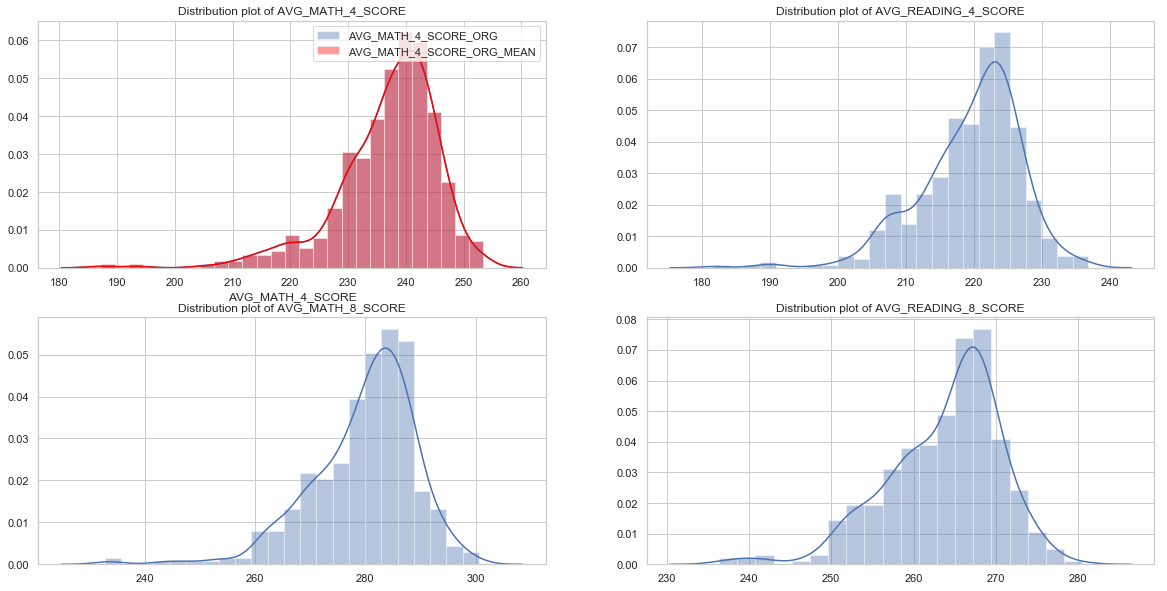

In [167]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(useducation2_df['AVG_MATH_4_SCORE'])
sns.distplot(useducation3_df['AVG_MATH_4_SCORE'], color ='red')
plt.title("Distribution plot of AVG_MATH_4_SCORE")
plt.xlabel('AVG_MATH_4_SCORE')
plt.legend(('AVG_MATH_4_SCORE_ORG', 'AVG_MATH_4_SCORE_ORG_MEAN', 'Masked if > 0.5', 'Masked if < -0.5'), loc='upper right')

plt.subplot(2,2,2)
sns.distplot(useducation2_df['AVG_READING_4_SCORE'])
plt.title("Distribution plot of AVG_READING_4_SCORE")
plt.xlabel('')

plt.subplot(2,2,3)
sns.distplot(useducation2_df['AVG_MATH_8_SCORE'])
plt.title("Distribution plot of AVG_MATH_8_SCORE")
plt.xlabel('')

plt.subplot(2,2,4)
sns.distplot(useducation2_df['AVG_READING_8_SCORE'])
plt.title("Distribution plot of AVG_READING_8_SCORE")
plt.xlabel('')

plt.show()

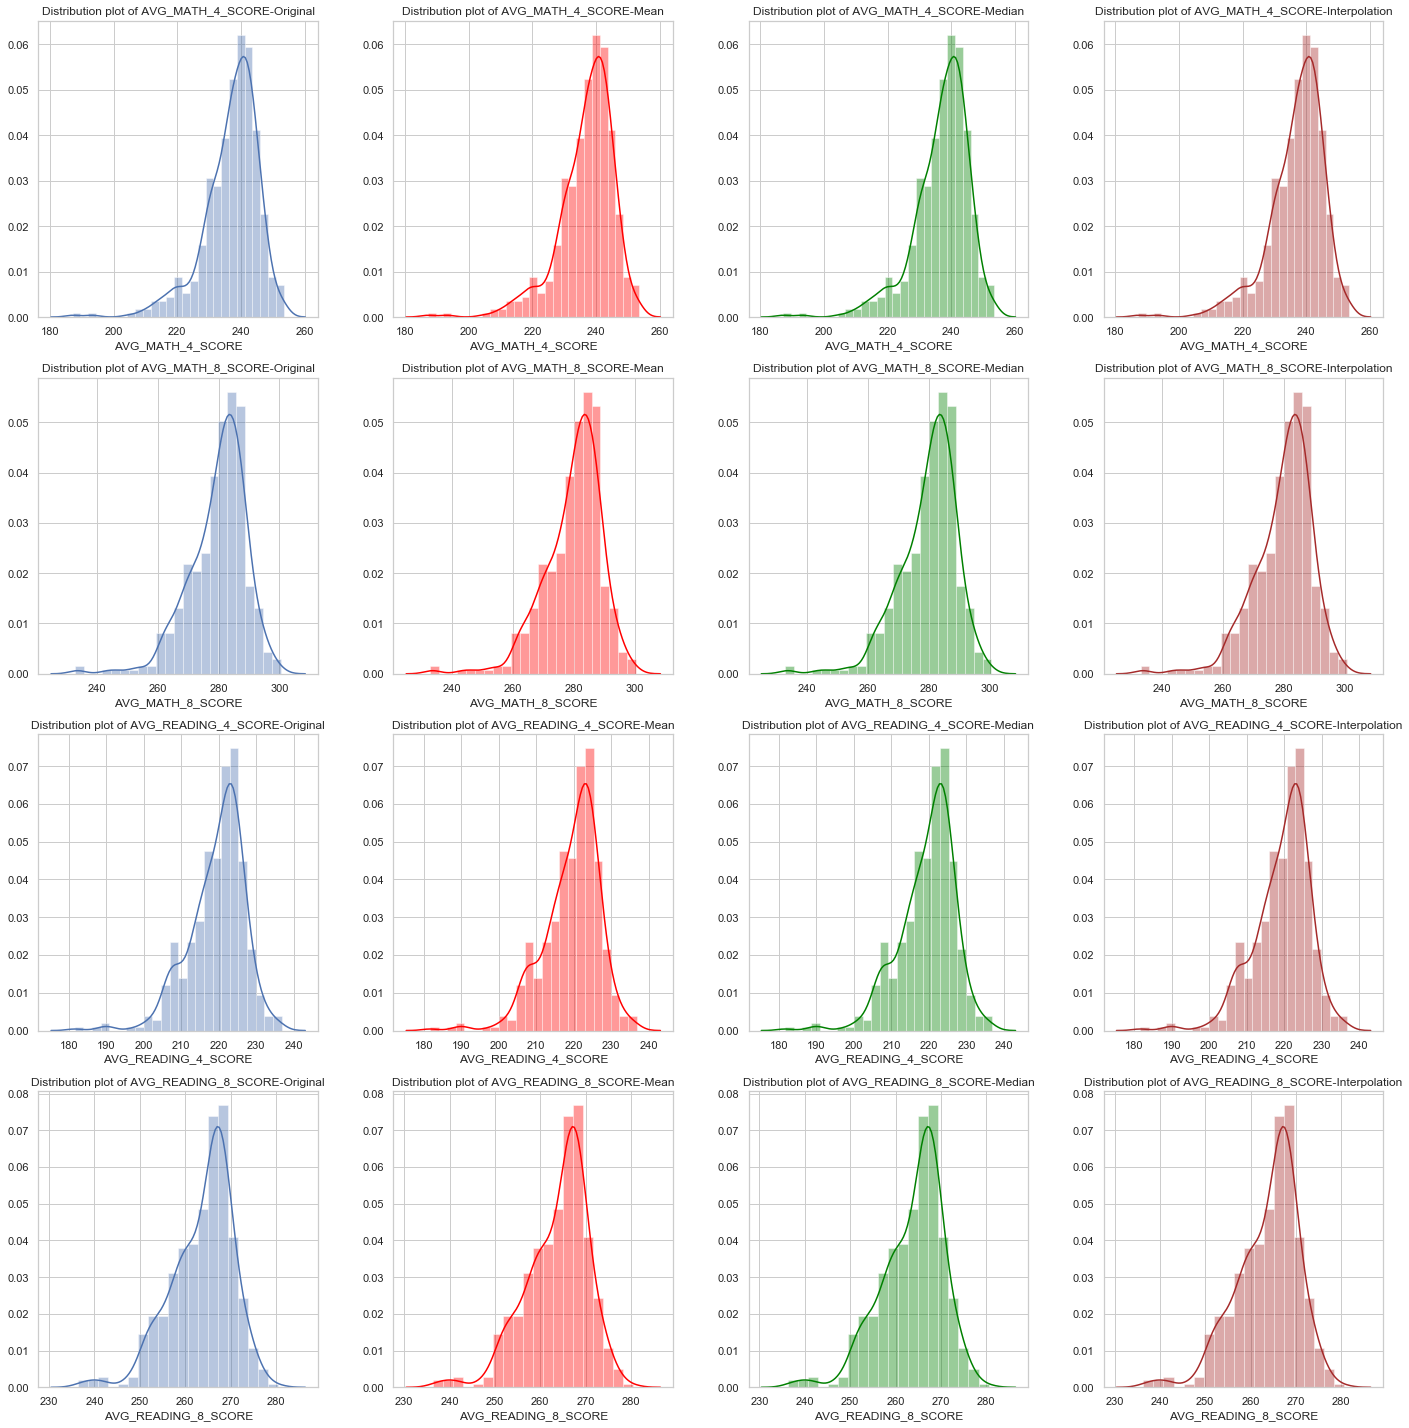

In [171]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
sns.distplot(useducation2_df['AVG_MATH_4_SCORE'])
plt.title("Distribution plot of AVG_MATH_4_SCORE-Original")

plt.subplot(4,4,2)
sns.distplot(useducation3_df['AVG_MATH_4_SCORE'], color ='red')
plt.title("Distribution plot of AVG_MATH_4_SCORE-Mean")

plt.subplot(4,4,3)
sns.distplot(useducation4_df['AVG_MATH_4_SCORE'], color = 'green')
plt.title("Distribution plot of AVG_MATH_4_SCORE-Median")

plt.subplot(4,4,4)
sns.distplot(useducation5_df['AVG_MATH_4_SCORE'], color = 'brown')
plt.title("Distribution plot of AVG_MATH_4_SCORE-Interpolation")


plt.subplot(4,4,5)
sns.distplot(useducation2_df['AVG_MATH_8_SCORE'])
plt.title("Distribution plot of AVG_MATH_8_SCORE-Original")

plt.subplot(4,4,6)
sns.distplot(useducation3_df['AVG_MATH_8_SCORE'], color ='red')
plt.title("Distribution plot of AVG_MATH_8_SCORE-Mean")

plt.subplot(4,4,7)
sns.distplot(useducation4_df['AVG_MATH_8_SCORE'], color = 'green')
plt.title("Distribution plot of AVG_MATH_8_SCORE-Median")

plt.subplot(4,4,8)
sns.distplot(useducation5_df['AVG_MATH_8_SCORE'], color = 'brown')
plt.title("Distribution plot of AVG_MATH_8_SCORE-Interpolation")


plt.subplot(4,4,9)
sns.distplot(useducation2_df['AVG_READING_4_SCORE'])
plt.title("Distribution plot of AVG_READING_4_SCORE-Original")

plt.subplot(4,4,10)
sns.distplot(useducation3_df['AVG_READING_4_SCORE'], color ='red')
plt.title("Distribution plot of AVG_READING_4_SCORE-Mean")

plt.subplot(4,4,11)
sns.distplot(useducation4_df['AVG_READING_4_SCORE'], color = 'green')
plt.title("Distribution plot of AVG_READING_4_SCORE-Median")

plt.subplot(4,4,12)
sns.distplot(useducation5_df['AVG_READING_4_SCORE'], color = 'brown')
plt.title("Distribution plot of AVG_READING_4_SCORE-Interpolation")

plt.subplot(4,4,13)
sns.distplot(useducation2_df['AVG_READING_8_SCORE'])
plt.title("Distribution plot of AVG_READING_8_SCORE-Original")

plt.subplot(4,4,14)
sns.distplot(useducation3_df['AVG_READING_8_SCORE'], color ='red')
plt.title("Distribution plot of AVG_READING_8_SCORE-Mean")

plt.subplot(4,4,15)
sns.distplot(useducation4_df['AVG_READING_8_SCORE'], color = 'green')
plt.title("Distribution plot of AVG_READING_8_SCORE-Median")

plt.subplot(4,4,16)
sns.distplot(useducation5_df['AVG_READING_8_SCORE'], color = 'brown')
plt.title("Distribution plot of AVG_READING_8_SCORE-Interpolation")

plt.tight_layout()
plt.show()